In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

from tensorflow.keras import Model, metrics
from tensorflow.keras.layers import Dense, Dropout, Input

# Set the seeds
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

In [2]:
#preparing data
dataset = pd.read_csv('Data/train.csv')

features = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea']
#features = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']
data = dataset[features]

# Filling nan with the mean of the column:
data = data.fillna(data.mean())

# Extract input values and normalize
x = data[features[1:]]
scale = StandardScaler()
x = scale.fit_transform(x)

# Extract output values (prices) and normalize
y = data[features[0]].values
y = y/100000

# Split into 75% for train and 25% for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed_value)

In [3]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
#display function
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, np.array(h['mean_absolute_error'])*1e5, '.-',
                               epochs, np.array(h['val_mean_absolute_error'])*1e5, '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('MAE')
    plt.legend(['Train', 'Validation'])
        
    print('Train MAE     ', h['mean_absolute_error'][-1]*1e5)
    print('Validation MAE', h['val_mean_absolute_error'][-1]*1e5)

In [71]:
#building the network
inputs = Input(shape=x.shape[1])
outputs = Dense(200, activation='relu')(inputs)
outputs = Dense(50, activation='relu')(outputs)
#outputs = Dense(10, activation='relu')(outputs)
outputs = Dense(1, activation='linear')(outputs)
model = Model(inputs, outputs)

model.compile(optimizer ='adam', loss ='mean_squared_error', metrics =[metrics.mae])
model.summary()

Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 6)]               0         
                                                                 
 dense_96 (Dense)            (None, 200)               1400      
                                                                 
 dense_97 (Dense)            (None, 50)                10050     
                                                                 
 dense_98 (Dense)            (None, 1)                 51        
                                                                 
Total params: 11,501
Trainable params: 11,501
Non-trainable params: 0
_________________________________________________________________


Train MAE      15357.770025730133
Validation MAE 20989.760756492615


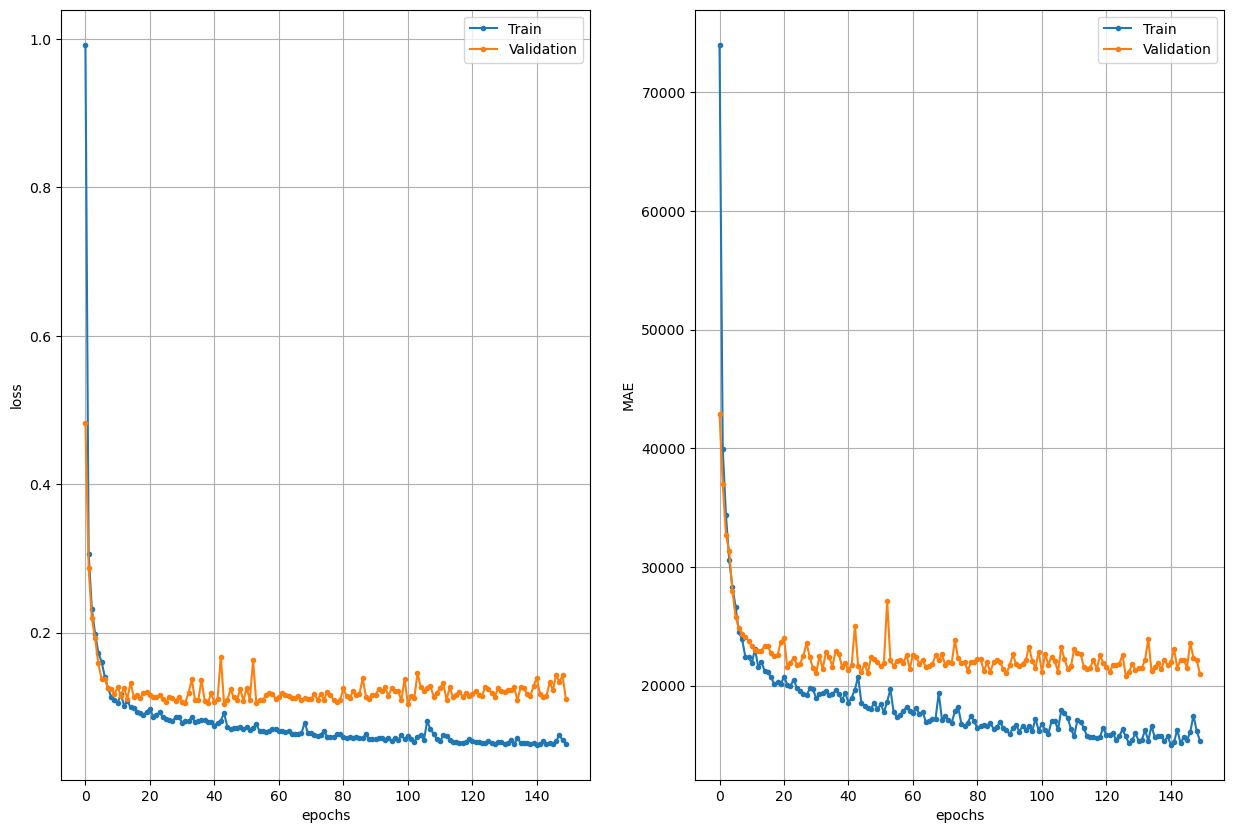

In [72]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=32, verbose=0)
plot_history(history)

<h2>Questions</h2>
<b>1. What is the new price estimation error after your modifrications? Is it better than before?</b><br>
<i>~15000. Yes it is much better</i><br><br>
<b>2. Does adding more features help?</b><br>
<i>Adding more features definitely helps. Any additional info making our network more clever. Even if it has too few neurons. But with a few neurons an effect will be not so noticeable.</i><br><br>
<b>3. Does adding more neurons help?</b><br>
<i>Definitely yes! Seems like noticeable effect from adding neurons to the first layer stops after about 200neurons. I've tried the second layer and figured out that there is no sence to add more than 50neurons. Also the third layer almost have no effect.</i><br><br>
<b>4. What would you do to improv the network even further?</b><br>
<i>Have no idea except adding new features and bigger datasets for network education. But it probably will cause reworking of the network architecture. It seems like the architecture of the neural network for certain purpose have to be predicted in some way to avoid endless guessing of layers and neurons quantity if new data or features become available. But it all totally new for me, maybe I'll find answers in further lections-)</i><br><br>

<h2>Thanks for viewing!</h2> ❤️️